In [1]:
import numpy as np
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

In [2]:
def bernoulliRandom(p: float):
    """Returns a random value from a Bernoulli distribution with parameter p."""
    value = 1 if np.random.rand() < p else 0
    return value

In [3]:
def discreteUniformRandom(n: int):
    """Returns a random integer between 0 and n-1 from a discrete uniform distribution."""
    randValue = np.random.rand()
    delta = 1 / n
    value = int(randValue/delta)
    return value

In [4]:
tossFairCoin = lambda: bernoulliRandom(0.5) # Head = 1, Tail = 0
tossBiasedCoin = lambda: bernoulliRandom(0.75) # Head = 1, Tail = 0
tossRandomlyChosenCoin = lambda: bernoulliRandom(0.625) # Head = 1, Tail = 0

In [5]:
def randomlyChooseCoinTossFunc(tossFunctionList: list):
    chosenIndex = discreteUniformRandom(len(tossFunctionList))
    chosenTossFunction = tossFunctionList[chosenIndex]
    return [chosenIndex, chosenTossFunction]

In [6]:
def simulateTosses(tossFunctions, n):
    chosenCoinIndex, tossRandomlyChosenCoin = randomlyChooseCoinTossFunc(tossFunctions)
    tosses = [tossRandomlyChosenCoin() for _ in range(n)]
    return chosenCoinIndex, tosses

Fraction of heads: 0.6260


100%|██████████| 100000/100000 [00:03<00:00, 28190.51it/s]


Text(0.5, 0, 'Sample size')

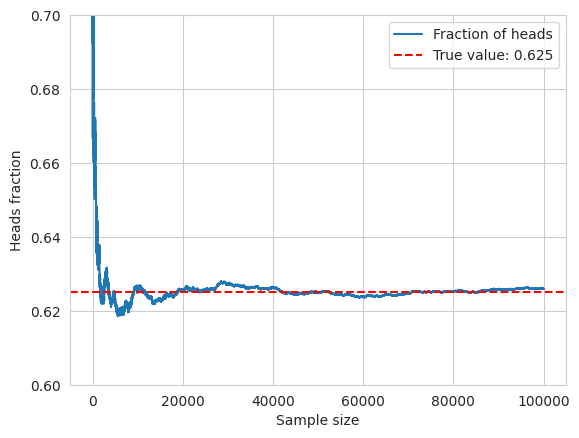

In [8]:
_, tosses = simulateTosses([tossRandomlyChosenCoin], 100000)
tosses = np.array(tosses)
print(f"Fraction of heads: {tosses.mean():.4f}")
headsFractionEvolution = np.array([tosses[:i].mean() for i in tqdm(range(1,len(tosses)+1))])
fig = sns.lineplot(x=range(1,len(tosses)+1), y=headsFractionEvolution)
fig.axhline(0.625, color='red', linestyle='--')
plt.ylim(0.6,0.7)
plt.legend(["Fraction of heads", "True value: 0.625"])
plt.ylabel("Heads fraction")
plt.xlabel("Sample size")
# plt.title("Convergence of the fraction of heads to the theorical value")